In [355]:
import requests 
from bs4 import BeautifulSoup 

In [356]:
url = 'https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page=2'


In [357]:
page = requests.get(url)


In [358]:
page.status_code

200

In [359]:
html_code = page.text 

print(html_code)

<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>properties in Kondapur:Makaan.com</title><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="viewport" content="minimum-scale=1.0, width=device-width, initial-scale=1.0, maximum-scale=5.0, user-scalable=no"><link rel="preload" href="//static.makaan.com/scripts/vendor/require.min.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/main.78506434.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/infra.a7ac1784.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/dependency/commonBundle.4610cbcc.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/app.7d0dcfaa.js" as="script"><meta name="twitter:card" content="summary"><meta name="twitte

In [360]:
soup = BeautifulSoup(html_code)

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   properties in Kondapur:Makaan.com
  </title>
  <meta content="#fff" id="themeColor" name="theme-color"/>
  <meta content="origin" name="referrer"/>
  <meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/>
  <meta content="155462194517712" name="fb:pages"/>
  <meta content="minimum-scale=1.0, width=device-width, initial-scale=1.0, maximum-scale=5.0, user-scalable=no" name="viewport"/>
  <link as="script" href="//static.makaan.com/scripts/vendor/require.min.js" rel="preload"/>
  <link as="script" href="//static.makaan.com/scripts/main.78506434.js" rel="preload"/>
  <link as="script" href="//static.makaan.com/scripts/infra.a7ac1784.js" rel="preload"/>
  <link as="script" href="//static.makaan.com/scripts/dependency/commonBundle.4610cbcc.js" rel="preload"/>
  <link as="script" href="//static.makaan.com/scripts/app.7d0dcfaa.js" rel="preload"/>
  <me

In [361]:
for i in range(2,11):
    
    print('https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page={}'.format(i))
    
    

https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page=2
https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page=3
https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page=4
https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page=5
https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page=6
https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondap

In [362]:
%%time 

title = []

status = []

agent = []

area = []

total_price_row = []


for i in range(2,32):
    
    url = 'https://www.makaan.com/listings?listingType=buy&pageType=LOCALITY_URLS&localityName=Kondapur&localityId=51242&cityId=12&templateId=MAKAAN_LOCALITY_LISTING_BUY&_=1672856078645&page={}'.format(i)
    
    page = requests.get(url)
    
    html_code = page.text
    
    soup = BeautifulSoup(html_code)
    
    for x in soup.find_all('div' , attrs = {'class' : 'cardLayout clearfix'}):
        
        # titles means title 
        
        titles = soup.find('div' ,attrs = {'class','title-line-wrap'})
        
        if titles is None:
            title.append(np.NaN)
        else:
            title.append(titles.text)
        
        # update means status
        
        update = x.find('tr' , attrs ={'class':'hcol w44'})
        
        if update is None:
            status.append(np.NaN)
        else:
            status.append(update.text)
        
        # agents means agent 
        
        agents = x.find('div' , attrs = {'class' : 'seller-info'})
        
        if agents is None:
            agent.append(np.NaN)
        else:
            agent.append(agents.text)
        
        #location is a area 
        
        location = x.find('span' , attrs ={'class':'locName'})
        
        if location is None:
            area.append(np.NaN)
        else:
            area.append(location.text)
        
        # price means  means  total_price_row
        
        price = x.find('table' , attrs = {'class':'listing-highlights'})
        
        if price is None:
            total_price_row.append(np.NaN)
        else:
            total_price_row.append(price.text)
            
            
            

Wall time: 57.9 s


In [363]:
print(len(title))
print(len(area))
print(len(agent))
print(len(status))
print(len(total_price_row))

600
600
600
600
600


#  DataFrame

Import The Libraries for performing Mathematical Computation and Manipulation DataFrame and Anlysis

using libraries:
    numpy , pandas

In [364]:
import numpy as np
import pandas as pd

In [365]:
df = pd.DataFrame({'villa_name':title , 'price':total_price_row ,'agents':agent, 'position':status,'locality':area})



In [366]:
df.villa_name.head(250)

0      2 BHK Apartment in My Home MangalaKondapur, Hy...
1      2 BHK Apartment in My Home MangalaKondapur, Hy...
2      2 BHK Apartment in My Home MangalaKondapur, Hy...
3      2 BHK Apartment in My Home MangalaKondapur, Hy...
4      2 BHK Apartment in My Home MangalaKondapur, Hy...
                             ...                        
245    2 BHK Apartment in Aparna Serene ParkKondapur,...
246    2 BHK Apartment in Aparna Serene ParkKondapur,...
247    2 BHK Apartment in Aparna Serene ParkKondapur,...
248    2 BHK Apartment in Aparna Serene ParkKondapur,...
249    2 BHK Apartment in Aparna Serene ParkKondapur,...
Name: villa_name, Length: 250, dtype: object

In [367]:
df.head()

,villa_name,price,agents,position,locality
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"


In [368]:
df.tail()

,villa_name,price,agents,position,locality
595,4 BHK Apartment in SMR Vinay Iconia Phase II B...,"Specifications 1.96 Cr10,017 / sq ft1965 Area ...",BSCPL Infrastructure LtdBUILDER0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
596,4 BHK Apartment in SMR Vinay Iconia Phase II B...,"Specifications 1.96 Cr10,017 / sq ft1965 Area ...",BSCPL Infrastructure LtdBUILDER0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
597,4 BHK Apartment in SMR Vinay Iconia Phase II B...,"Specifications 2.31 Cr10,123 / sq ft2290 Area ...",BSCPL Infrastructure LtdBUILDER0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
598,4 BHK Apartment in SMR Vinay Iconia Phase II B...,"Specifications 2.31 Cr10,123 / sq ft2290 Area ...",BSCPL Infrastructure LtdBUILDER0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
599,4 BHK Apartment in SMR Vinay Iconia Phase II B...,"Specifications 1.96 Cr10,017 / sq ft1965 Area ...",BSCPL Infrastructure LtdBUILDER0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   villa_name  600 non-null    object
 1   price       600 non-null    object
 2   agents      600 non-null    object
 3   position    600 non-null    object
 4   locality    600 non-null    object
dtypes: object(5)
memory usage: 23.6+ KB


# Above DataFrame save it into csv_file

In [370]:
df.to_csv('KondapurRealestate_Deatils.csv')

In [371]:
df.head(5)

,villa_name,price,agents,position,locality
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"


In [372]:
df.shape

(600, 5)

In [373]:
df.isnull().sum()

villa_name    0
price         0
agents        0
position      0
locality      0
dtype: int64

# Extracting the details using regex

In [374]:
import re 

In [375]:
df.head()

,villa_name,price,agents,position,locality
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad"
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad"


In [376]:
regex = r'\s[\d+.]+ [a-zA-Z]+'
df['villa_price']=df['price'].apply(lambda x : re.findall (regex,x))

In [377]:
df.head()

,villa_name,price,agents,position,locality,villa_price
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr]


In [378]:
regex = r'\d+\s[a-zA-Z]+\s[Villa|Studio|Apartment]+|\sApartment'
df['type_of_villa']=df['villa_name'].apply(lambda x : re.findall(regex , x))

In [379]:
df.head()

,villa_name,price,agents,position,locality,villa_price,type_of_villa
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment]


In [380]:
regex = r'(\d+,\d+)'
df['villa_price_sq_ft']=df['price'].apply(lambda x : re.findall(regex , x))

In [381]:
df.head()

,villa_name,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]"
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]"
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]"
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]"
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]"


In [382]:
regex = r'ft(\d+)'
df['villa_area']=df['price'].apply(lambda x : re.findall(regex , x))

In [383]:
df.head()

,villa_name,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710]


In [384]:
regex = r'^[\d]'
df['type_of_BHK'] = df['villa_name'].apply(lambda x : re.findall(regex , x))

In [385]:
df.head()

,villa_name,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2]


In [386]:
regex=r'in\s[a-zA-Z\s]+(?:Kondapur)|Kondapur'

df['street'] = df['villa_name'].apply(lambda x : re.findall(regex, x))


In [387]:
df.head()

,villa_name,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur]


In [388]:
regex =r'(.*)(?:BUILDER0|AGENT0)'

df['agent']=df['agents'].apply(lambda x : re.findall(regex ,x))



In [389]:
df.head()

,villa_name,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana]


In [390]:
regex = r'(.*)(?:Construction Status|\/Resale)'

df['status']=df['position'].apply(lambda x : re.findall(regex ,x))

df.head()


,villa_name,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates],[Ready to move]
1,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin],[Ready to move]
2,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants],[Ready to move]
3,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar],[Under Construction]
4,"2 BHK Apartment in My Home MangalaKondapur, Hy...","Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana],[Under Construction]


# Remove UnWanted Columns

In [391]:
df.drop('villa_name', axis=1,inplace = True)

In [392]:
df.head()

,price,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Specifications 1.5 Cr9,375 / sq ft1600 Area in...",Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates],[Ready to move]
1,"Specifications 1.35 Cr7,485 / sq ft1815 Area i...",BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin],[Ready to move]
2,"Specifications 1.55 Cr7,948 / sq ft1950 Area i...",Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants],[Ready to move]
3,"Specifications 1.37 Cr7,002 / sq ft1964 Area i...",YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar],[Under Construction]
4,"Specifications 2.14 Cr7,919 / sq ft2710 Area i...",RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana],[Under Construction]


In [393]:
df.drop('price', axis=1,inplace = True)

In [394]:
df.head()

,agents,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,Vivek AssociatesAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates],[Ready to move]
1,BestpropinAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin],[Ready to move]
2,Sahara Real Estate ConsultantsAGENT0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants],[Ready to move]
3,YugandharAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar],[Under Construction]
4,RamanaAGENT0,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana],[Under Construction]


In [395]:
df.drop('agents', axis=1,inplace = True)

In [396]:
df.head()

,position,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates],[Ready to move]
1,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin],[Ready to move]
2,Ready to moveConstruction Status,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants],[Ready to move]
3,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar],[Under Construction]
4,Under ConstructionConstruction Status,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana],[Under Construction]


In [397]:
df.drop('position', axis=1,inplace = True)

In [398]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates],[Ready to move]
1,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin],[Ready to move]
2,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants],[Ready to move]
3,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar],[Under Construction]
4,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana],[Under Construction]


# Total Scrapped the data 

In [399]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",[ 1.5 Cr],[2 BHK Apartment],"[9,375]",[1600],[2],[in My Home MangalaKondapur],[Vivek Associates],[Ready to move]
1,"Kondapur, Hyderabad",[ 1.35 Cr],[2 BHK Apartment],"[7,485]",[1815],[2],[in My Home MangalaKondapur],[Bestpropin],[Ready to move]
2,"Kondapur, Hyderabad",[ 1.55 Cr],[2 BHK Apartment],"[7,948]",[1950],[2],[in My Home MangalaKondapur],[Sahara Real Estate Consultants],[Ready to move]
3,"Kondapur, Hyderabad",[ 1.37 Cr],[2 BHK Apartment],"[7,002]",[1964],[2],[in My Home MangalaKondapur],[Yugandhar],[Under Construction]
4,"Kondapur, Hyderabad",[ 2.14 Cr],[2 BHK Apartment],"[7,919]",[2710],[2],[in My Home MangalaKondapur],[Ramana],[Under Construction]


All columns data having the List.So remove the list

In [400]:
df.villa_price = df.villa_price.apply(lambda x : ''.join(x))

df.type_of_villa = df.type_of_villa.apply(lambda x : ''.join(x))

df.villa_price_sq_ft = df.villa_price_sq_ft.apply(lambda x : ''.join(x))

df.villa_area = df.villa_area.apply(lambda x : ''.join(x))

df.type_of_BHK = df.type_of_BHK.apply(lambda x : ''.join(x))

df.street = df.street.apply(lambda x : ''.join(x))

df.agent = df.agent.apply(lambda x : ''.join(x))

df.status = df.status.apply(lambda x : ''.join(x))



In [401]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",1.5 Cr,2 BHK Apartment,"9,375",1600,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",1.35 Cr,2 BHK Apartment,"7,485",1815,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",1.55 Cr,2 BHK Apartment,"7,948",1950,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",1.37 Cr,2 BHK Apartment,"7,002",1964,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",2.14 Cr,2 BHK Apartment,"7,919",2710,2,in My Home MangalaKondapur,Ramana,Under Construction


In [402]:
df.tail()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
595,"Kondapur, Hyderabad",1.96 Cr,4 BHK Apartment,"10,017",1965,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
596,"Kondapur, Hyderabad",1.96 Cr,4 BHK Apartment,"10,017",1965,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
597,"Kondapur, Hyderabad",2.31 Cr,4 BHK Apartment,"10,123",2290,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
598,"Kondapur, Hyderabad",2.31 Cr,4 BHK Apartment,"10,123",2290,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
599,"Kondapur, Hyderabad",1.96 Cr,4 BHK Apartment,"10,017",1965,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction


# Cleaning the Data 

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   locality           600 non-null    object
 1   villa_price        600 non-null    object
 2   type_of_villa      600 non-null    object
 3   villa_price_sq_ft  600 non-null    object
 4   villa_area         600 non-null    object
 5   type_of_BHK        600 non-null    object
 6   street             600 non-null    object
 7   agent              600 non-null    object
 8   status             600 non-null    object
dtypes: object(9)
memory usage: 42.3+ KB


In [404]:
# Checking the missing values 

df.isnull().sum()

locality             0
villa_price          0
type_of_villa        0
villa_price_sq_ft    0
villa_area           0
type_of_BHK          0
street               0
agent                0
status               0
dtype: int64

In [405]:
type(df.type_of_BHK.isnull().sum())

numpy.int64

In [406]:
type(df.locality.isnull().sum())

numpy.int64

In [407]:
type(df.villa_price_sq_ft.isnull().sum())

numpy.int64

In [410]:
type(df.villa_price[0])

str

In [411]:
df['villa_price'] = df['villa_price'].apply(lambda x : float(x.replace('L',''))*100000 if 'L' in x else 
                                            
                                  float(x.replace('Cr',''))*10000000 if 'Cr' in x else float(x))

df['villa_price'] = df['villa_price'].astype(float)



In [412]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",15000000.0,2 BHK Apartment,"9,375",1600,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",13500000.0,2 BHK Apartment,"7,485",1815,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",15500000.0,2 BHK Apartment,"7,948",1950,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",13700000.0,2 BHK Apartment,"7,002",1964,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",21400000.0,2 BHK Apartment,"7,919",2710,2,in My Home MangalaKondapur,Ramana,Under Construction


In [413]:
df.tail()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
595,"Kondapur, Hyderabad",19600000.0,4 BHK Apartment,"10,017",1965,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
596,"Kondapur, Hyderabad",19600000.0,4 BHK Apartment,"10,017",1965,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
597,"Kondapur, Hyderabad",23100000.0,4 BHK Apartment,"10,123",2290,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
598,"Kondapur, Hyderabad",23100000.0,4 BHK Apartment,"10,123",2290,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
599,"Kondapur, Hyderabad",19600000.0,4 BHK Apartment,"10,017",1965,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction


In [414]:
type(df.villa_price[0])

numpy.float64

In [415]:
df.villa_price_sq_ft = df.villa_price_sq_ft.apply(lambda x : x.replace(',', ''))

df.villa_price_sq_ft =df.villa_price_sq_ft.astype(float)


In [416]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",15000000.0,2 BHK Apartment,9375.0,1600,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",13500000.0,2 BHK Apartment,7485.0,1815,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",15500000.0,2 BHK Apartment,7948.0,1950,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",13700000.0,2 BHK Apartment,7002.0,1964,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",21400000.0,2 BHK Apartment,7919.0,2710,2,in My Home MangalaKondapur,Ramana,Under Construction


In [417]:
df.villa_area =df.villa_area.astype(float)

In [418]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",15000000.0,2 BHK Apartment,9375.0,1600.0,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",13500000.0,2 BHK Apartment,7485.0,1815.0,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",15500000.0,2 BHK Apartment,7948.0,1950.0,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",13700000.0,2 BHK Apartment,7002.0,1964.0,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",21400000.0,2 BHK Apartment,7919.0,2710.0,2,in My Home MangalaKondapur,Ramana,Under Construction


In [419]:
df.type_of_BHK = df.type_of_BHK.astype(int)

In [420]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",15000000.0,2 BHK Apartment,9375.0,1600.0,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",13500000.0,2 BHK Apartment,7485.0,1815.0,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",15500000.0,2 BHK Apartment,7948.0,1950.0,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",13700000.0,2 BHK Apartment,7002.0,1964.0,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",21400000.0,2 BHK Apartment,7919.0,2710.0,2,in My Home MangalaKondapur,Ramana,Under Construction


In [421]:
df.villa_price.head()

0    15000000.0
1    13500000.0
2    15500000.0
3    13700000.0
4    21400000.0
Name: villa_price, dtype: float64

In [422]:
df.type_of_BHK.dtype

dtype('int32')

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   locality           600 non-null    object 
 1   villa_price        600 non-null    float64
 2   type_of_villa      600 non-null    object 
 3   villa_price_sq_ft  600 non-null    float64
 4   villa_area         600 non-null    float64
 5   type_of_BHK        600 non-null    int32  
 6   street             600 non-null    object 
 7   agent              600 non-null    object 
 8   status             600 non-null    object 
dtypes: float64(3), int32(1), object(5)
memory usage: 40.0+ KB


# Data Visulaization

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [425]:
import warnings
warnings.filterwarnings('ignore')

In [426]:
df.columns

Index(['locality', 'villa_price', 'type_of_villa', 'villa_price_sq_ft',
       'villa_area', 'type_of_BHK', 'street', 'agent', 'status'],
      dtype='object')

In [427]:
df.shape

(600, 9)

In [428]:
df.describe(percentiles=[0.02,0.10,0.20,0.30,0.45,0.80,0.95],include='all')

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
count,600,6.000000e+02,600,600.000000,600.000000,600.000000,600,600,600
unique,1,NaN,5,NaN,NaN,NaN,13,83,4
top,"Kondapur, Hyderabad",NaN,3 BHK Apartment,NaN,NaN,NaN,Kondapur,Proptiger,Under Construction
freq,600,NaN,340,NaN,NaN,NaN,280,103,381
mean,NaN,1.616730e+07,NaN,7721.841667,1874.531667,2.700000,NaN,NaN,NaN
std,NaN,2.015233e+07,NaN,2859.154547,1070.640332,0.737727,NaN,NaN,NaN
min,NaN,3.000000e+06,NaN,2480.000000,244.000000,1.000000,NaN,NaN,NaN
2%,NaN,3.300000e+06,NaN,3884.320000,365.000000,1.000000,NaN,NaN,NaN
10%,NaN,7.200000e+06,NaN,5697.000000,1200.000000,2.000000,NaN,NaN,NaN
20%,NaN,8.240000e+06,NaN,6078.200000,1250.000000,2.000000,NaN,NaN,NaN


In [429]:
df["type_of_BHK"].value_counts()

3    340
2    200
1     20
5     20
4     20
Name: type_of_BHK, dtype: int64

In [430]:
df["villa_price"].value_counts().head(257)

8700000.0     22
10000000.0    20
65900000.0    14
18300000.0    11
15000000.0     9
              ..
7300000.0      1
3250000.0      1
8040000.0      1
7010000.0      1
7156000.0      1
Name: villa_price, Length: 257, dtype: int64

In [431]:
df["villa_price_sq_ft"].value_counts().head(270)

7499.0    26
7300.0    26
8250.0    22
8500.0    20
7200.0    19
          ..
7491.0     1
5967.0     1
6022.0     1
7221.0     1
9510.0     1
Name: villa_price_sq_ft, Length: 270, dtype: int64

In [432]:
df["status"].value_counts().head(257)

Under Construction    381
Ready to move         209
NewNew                  6
ResaleNew               4
Name: status, dtype: int64

In [433]:
df["villa_area"].value_counts().head(10)

1165.0    17
5999.0    14
1200.0    12
1500.0    12
1600.0    11
1815.0    10
1475.0    10
2125.0    10
2080.0    10
1770.0    10
Name: villa_area, dtype: int64

In [434]:
df["locality"].value_counts().head()

Kondapur, Hyderabad    600
Name: locality, dtype: int64

In [435]:
df["street"].value_counts().head()

Kondapur                           280
in Lansum Eden GardensKondapur      40
in BSCPL Bollineni BionKondapur     40
in AR Green ValleyKondapur          40
in Pristine FernKondapur            40
Name: street, dtype: int64

In [436]:
# visulaize the type_of_BHK

In [437]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",15000000.0,2 BHK Apartment,9375.0,1600.0,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",13500000.0,2 BHK Apartment,7485.0,1815.0,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",15500000.0,2 BHK Apartment,7948.0,1950.0,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",13700000.0,2 BHK Apartment,7002.0,1964.0,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",21400000.0,2 BHK Apartment,7919.0,2710.0,2,in My Home MangalaKondapur,Ramana,Under Construction


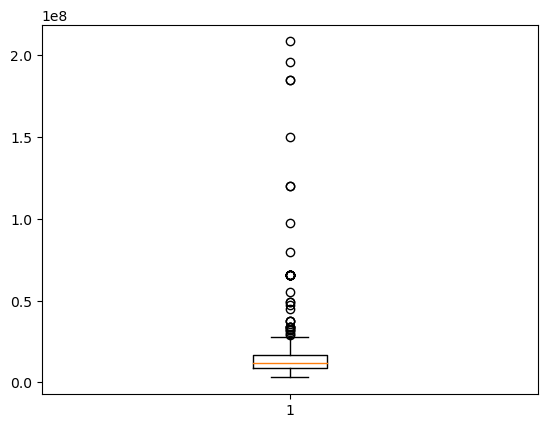

In [438]:
# Univariat Analysis
plt.boxplot(df.villa_price)
plt.show()

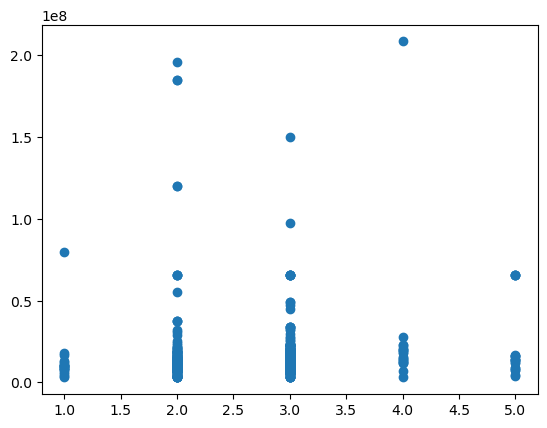

In [439]:
# BIvariate Analysis
plt.scatter(df.type_of_BHK,df.villa_price)
plt.show()

<AxesSubplot:xlabel='villa_price', ylabel='type_of_BHK'>

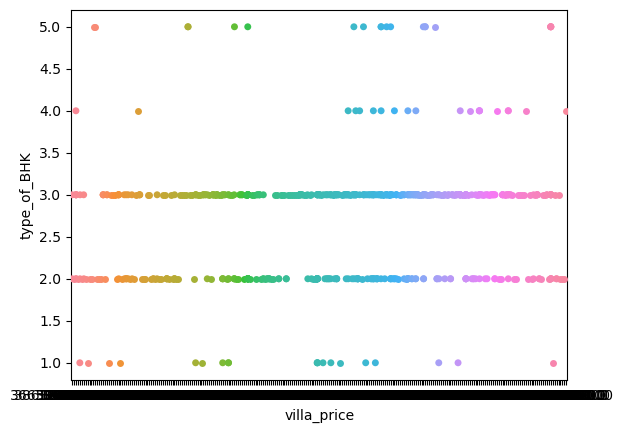

In [440]:
sns.stripplot(data=df,x='villa_price',y='type_of_BHK')

<AxesSubplot:xlabel='villa_price', ylabel='Density'>

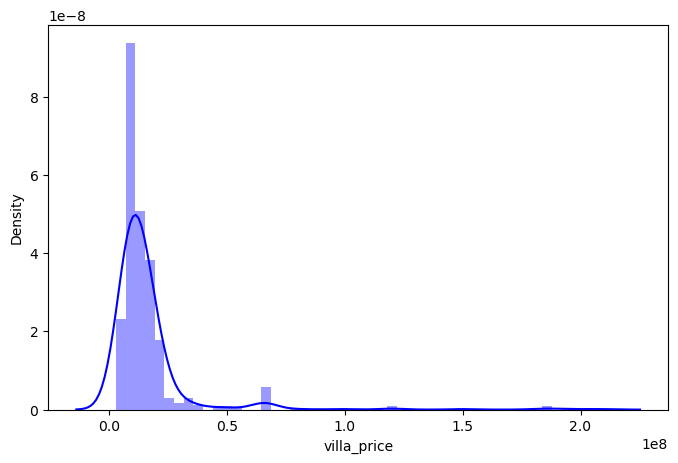

In [441]:
fig = plt.subplots(figsize=(8,5))
sns.distplot(df['villa_price'], hist=True, rug=False,color="b")

<AxesSubplot:xlabel='type_of_BHK', ylabel='Density'>

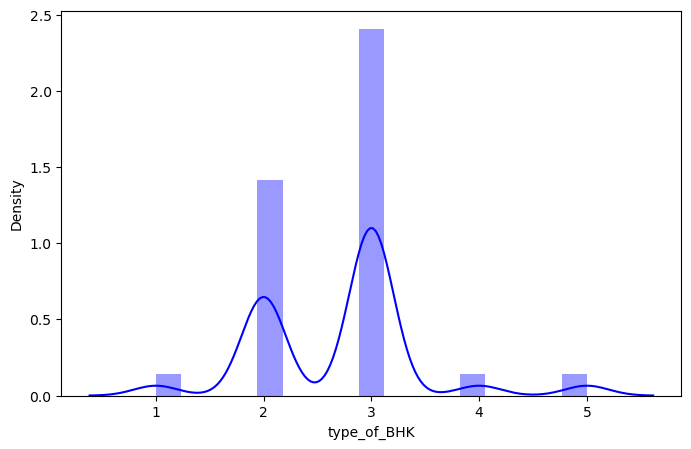

In [444]:
fig = plt.subplots(figsize=(8,5))
sns.distplot(df['type_of_BHK'], hist=True, rug=False,color="b")

<AxesSubplot:xlabel='villa_price'>

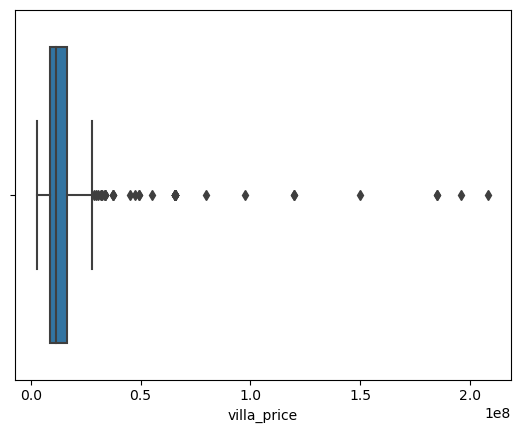

In [445]:
sns.boxplot(df.villa_price)

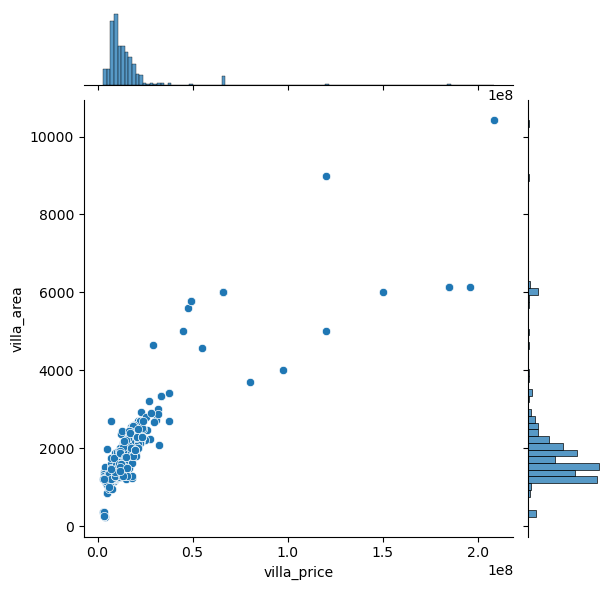

In [446]:
sns.jointplot(data=df,x='villa_price',y='villa_area',kind='scatter')

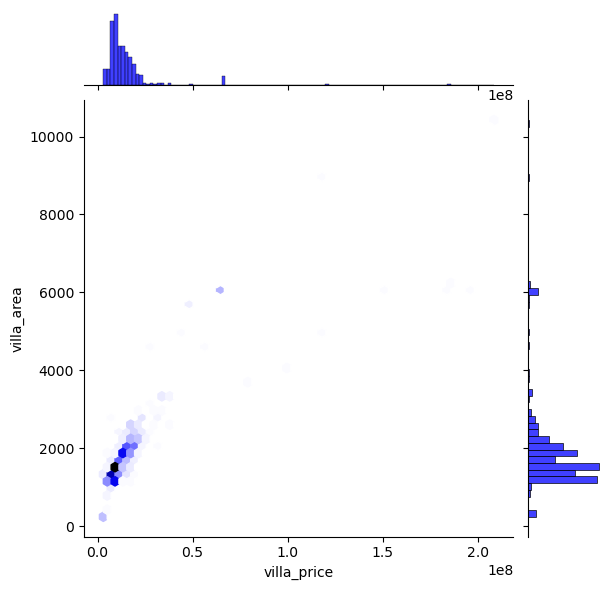

In [447]:
sns.jointplot(x='villa_price',y='villa_area',data=df,kind='hex',color='b')

In [448]:
print(df.villa_price.max())
print(df.villa_price.min())

208400000.0
3000000.0


Observations:--
    
    The Above plot observing the there are 1Bhk plot is there.
    Density was very low. That means there is less 1bhk's.
    2bhk is also very low compare to the 3bhks's. 
    In that type_of_BHK There is 3Bhk frequency is very high.that means most of bhk's are 3bhk's Only.

<AxesSubplot:xlabel='villa_price', ylabel='Density'>

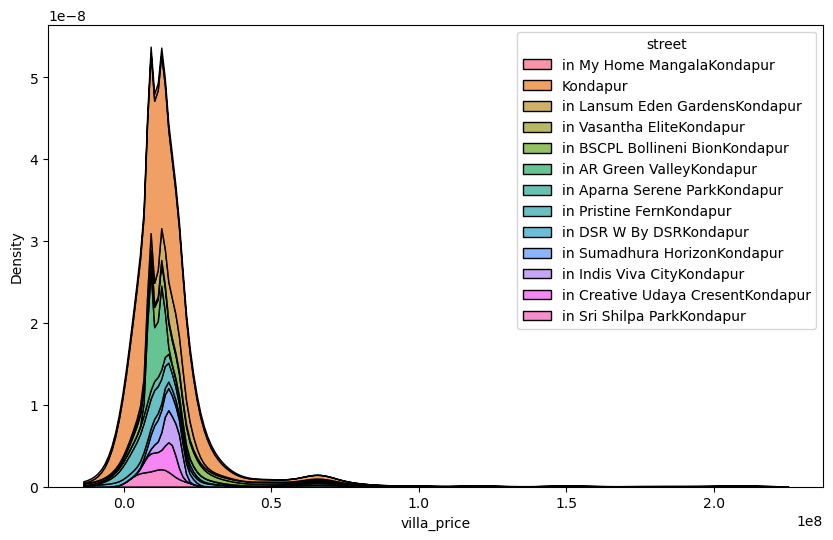

In [449]:
fig = plt.subplots(figsize=(10,6))
sns.kdeplot(data=df ,x='villa_price',hue='street',multiple ='stack')

<AxesSubplot:xlabel='status', ylabel='villa_area'>

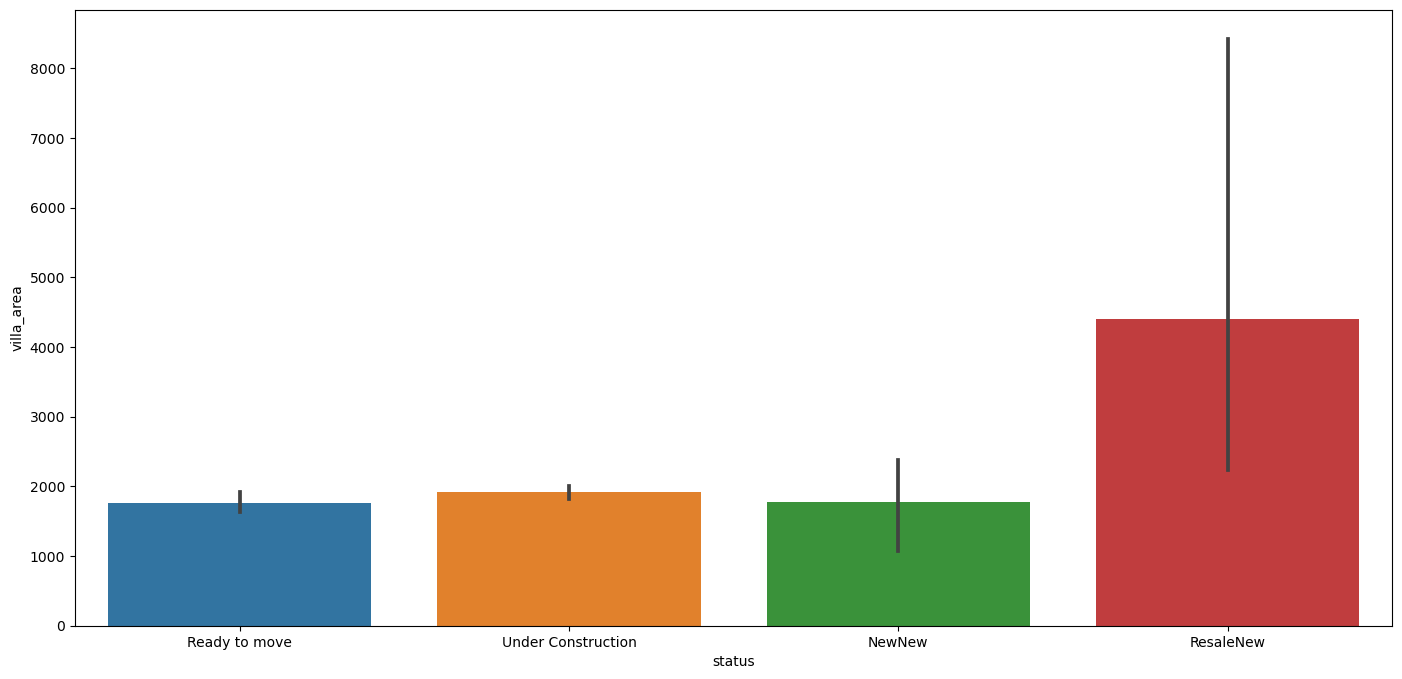

In [450]:
# Checking the which one having more place
fig = plt.subplots(figsize=(17,8))

sns.barplot(x='status',y='villa_area',data=df)

<AxesSubplot:xlabel='status', ylabel='villa_price'>

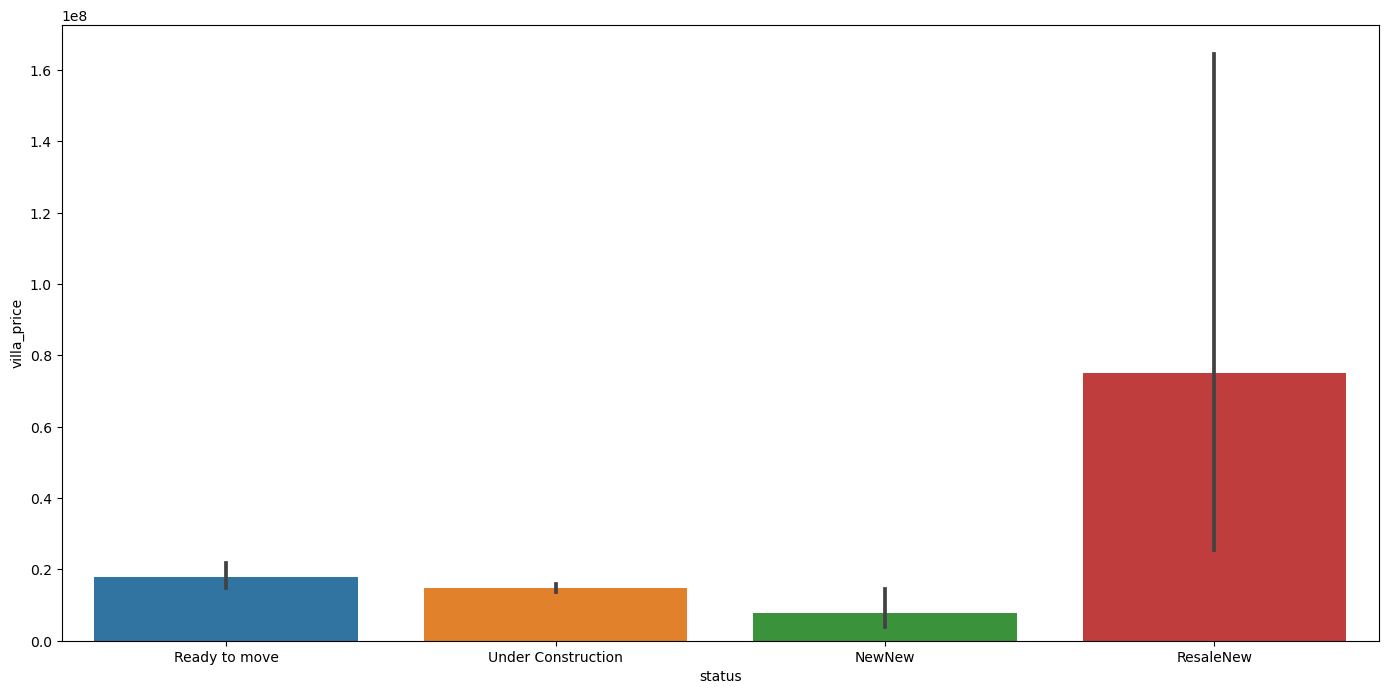

In [451]:
# Checking the which one have most cost
fig = plt.subplots(figsize=(17,8))

sns.barplot(x='status',y='villa_price',data=df)

<AxesSubplot:xlabel='type_of_villa', ylabel='villa_area'>

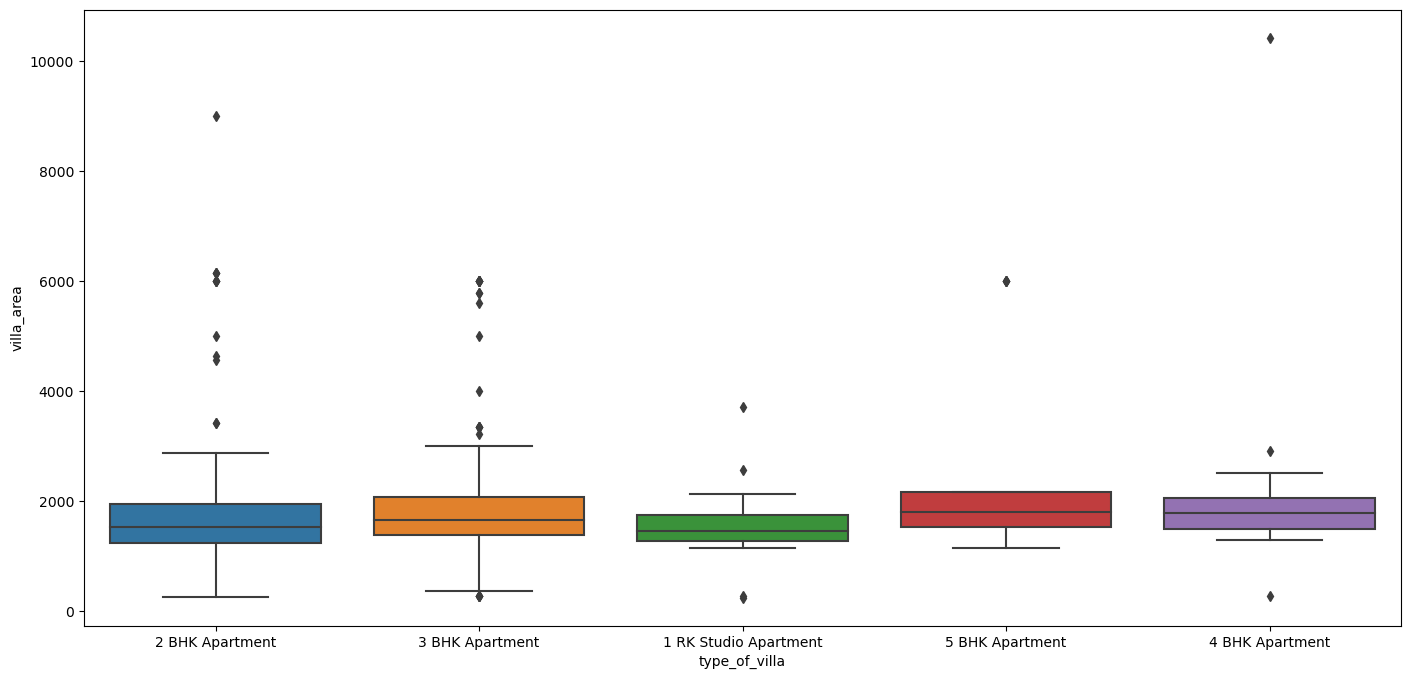

In [454]:
fig = plt.subplots(figsize=(17,8))
sns.boxplot(x='type_of_villa', y='villa_area', data=df)


<AxesSubplot:xlabel='type_of_BHK', ylabel='villa_price'>

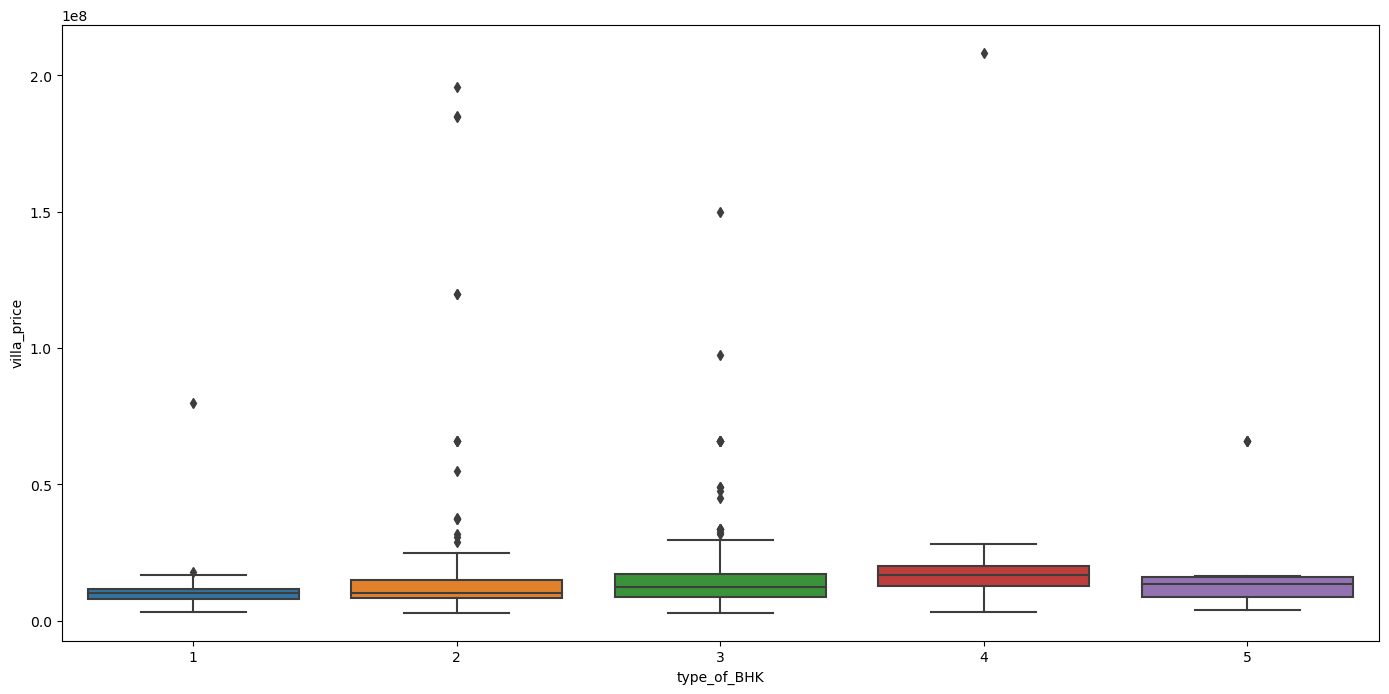

In [455]:
# plot the willa_price and type_of_bhk 

fig = plt.subplots(figsize=(17,8))
sns.boxplot(x='type_of_BHK', y='villa_price', data=df)

<AxesSubplot:xlabel='type_of_BHK', ylabel='street'>

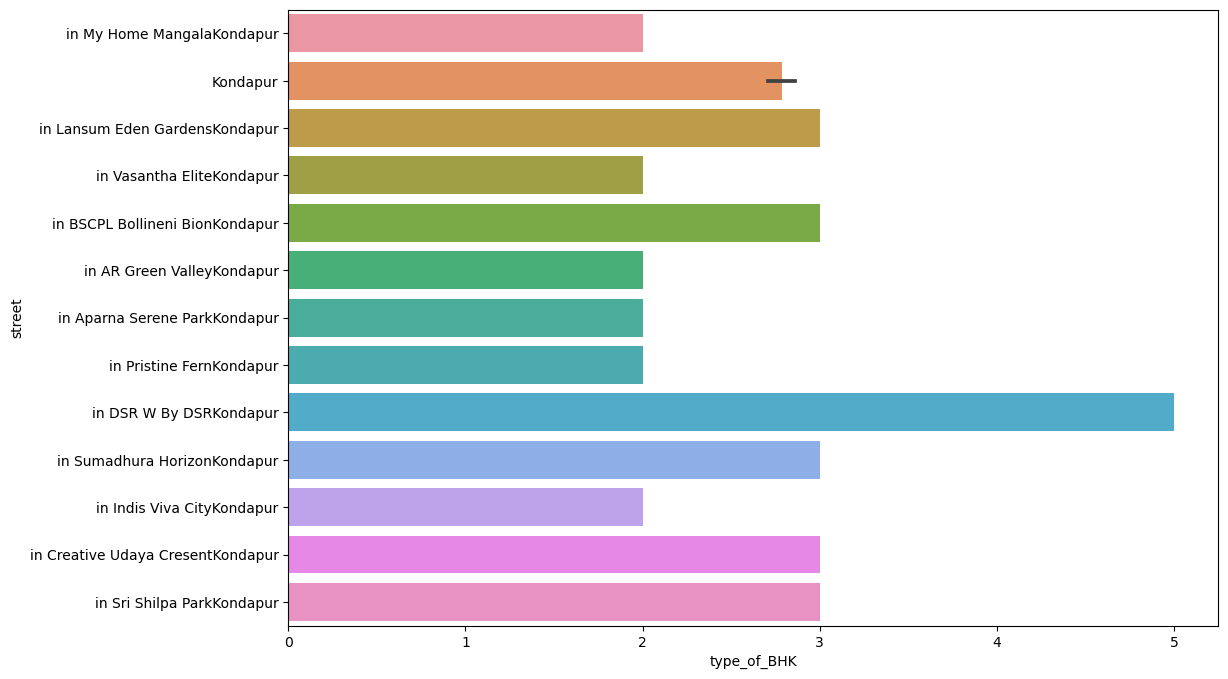

In [456]:
fig = plt.subplots(figsize=(12,8))
sns.barplot(x = "type_of_BHK", y = "street",  data=df)

In [457]:
df.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
0,"Kondapur, Hyderabad",15000000.0,2 BHK Apartment,9375.0,1600.0,2,in My Home MangalaKondapur,Vivek Associates,Ready to move
1,"Kondapur, Hyderabad",13500000.0,2 BHK Apartment,7485.0,1815.0,2,in My Home MangalaKondapur,Bestpropin,Ready to move
2,"Kondapur, Hyderabad",15500000.0,2 BHK Apartment,7948.0,1950.0,2,in My Home MangalaKondapur,Sahara Real Estate Consultants,Ready to move
3,"Kondapur, Hyderabad",13700000.0,2 BHK Apartment,7002.0,1964.0,2,in My Home MangalaKondapur,Yugandhar,Under Construction
4,"Kondapur, Hyderabad",21400000.0,2 BHK Apartment,7919.0,2710.0,2,in My Home MangalaKondapur,Ramana,Under Construction


<AxesSubplot:xlabel='villa_price', ylabel='Density'>

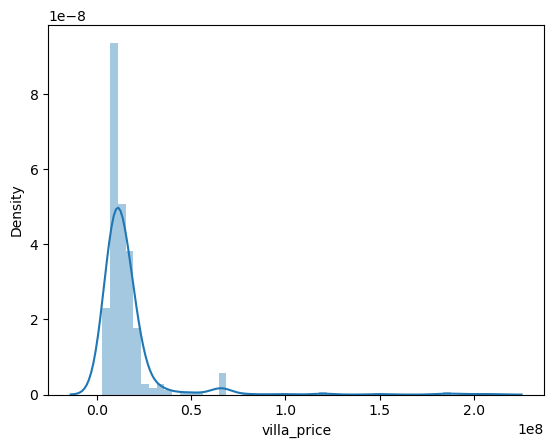

In [458]:
sns.distplot(df.villa_price)


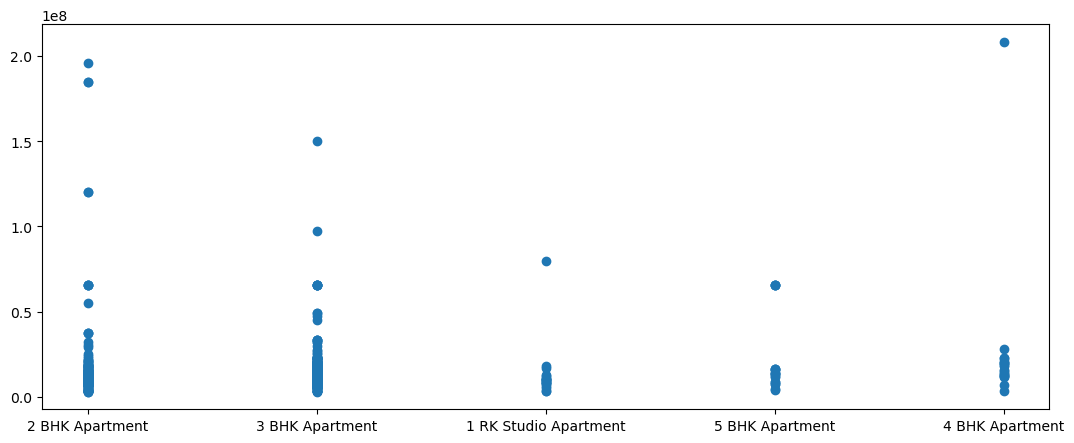

In [459]:
# Sctter plot between willa_price and type_of_willa
fig = plt.subplots(figsize=(13,5))
plt.scatter(df.type_of_villa,df.villa_price)
plt.show()

<AxesSubplot:xlabel='type_of_villa', ylabel='villa_price'>

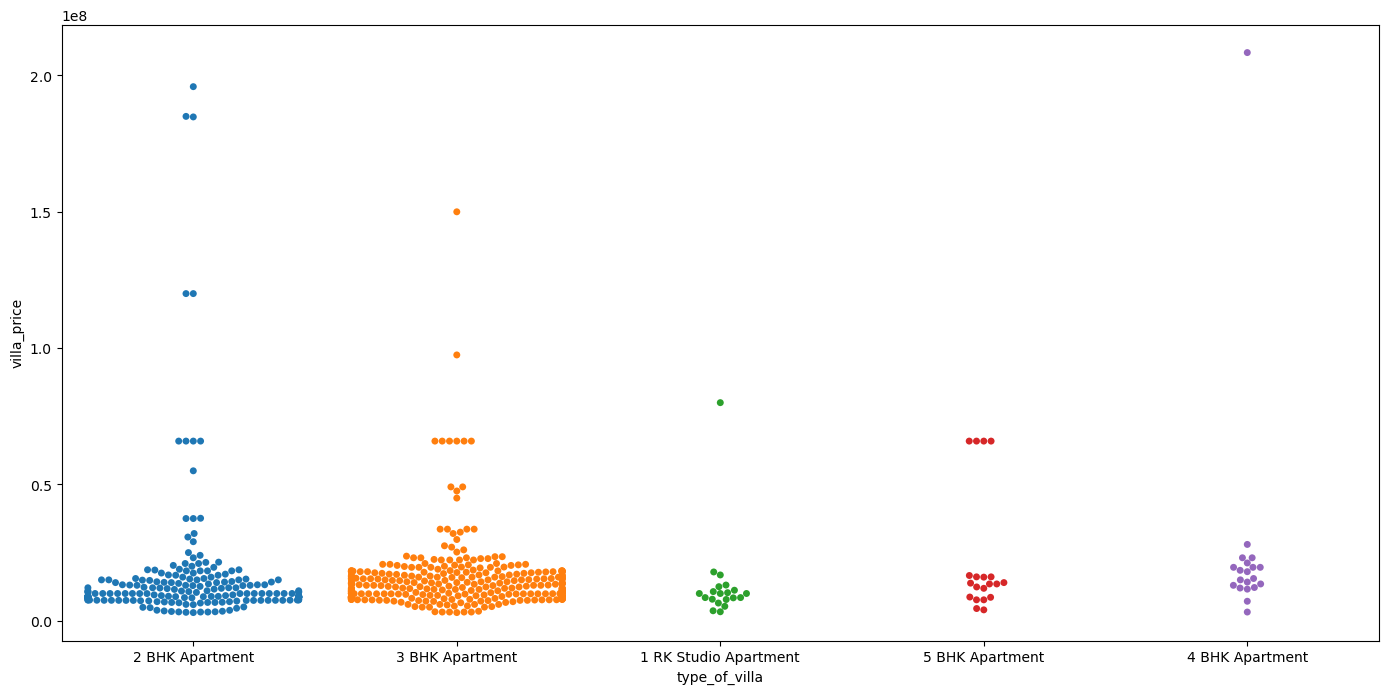

In [460]:
# The above plots is not clear so using Swarm plot
fig = plt.subplots(figsize=(17,8))

sns.swarmplot(data=df , x ='type_of_villa',y='villa_price')

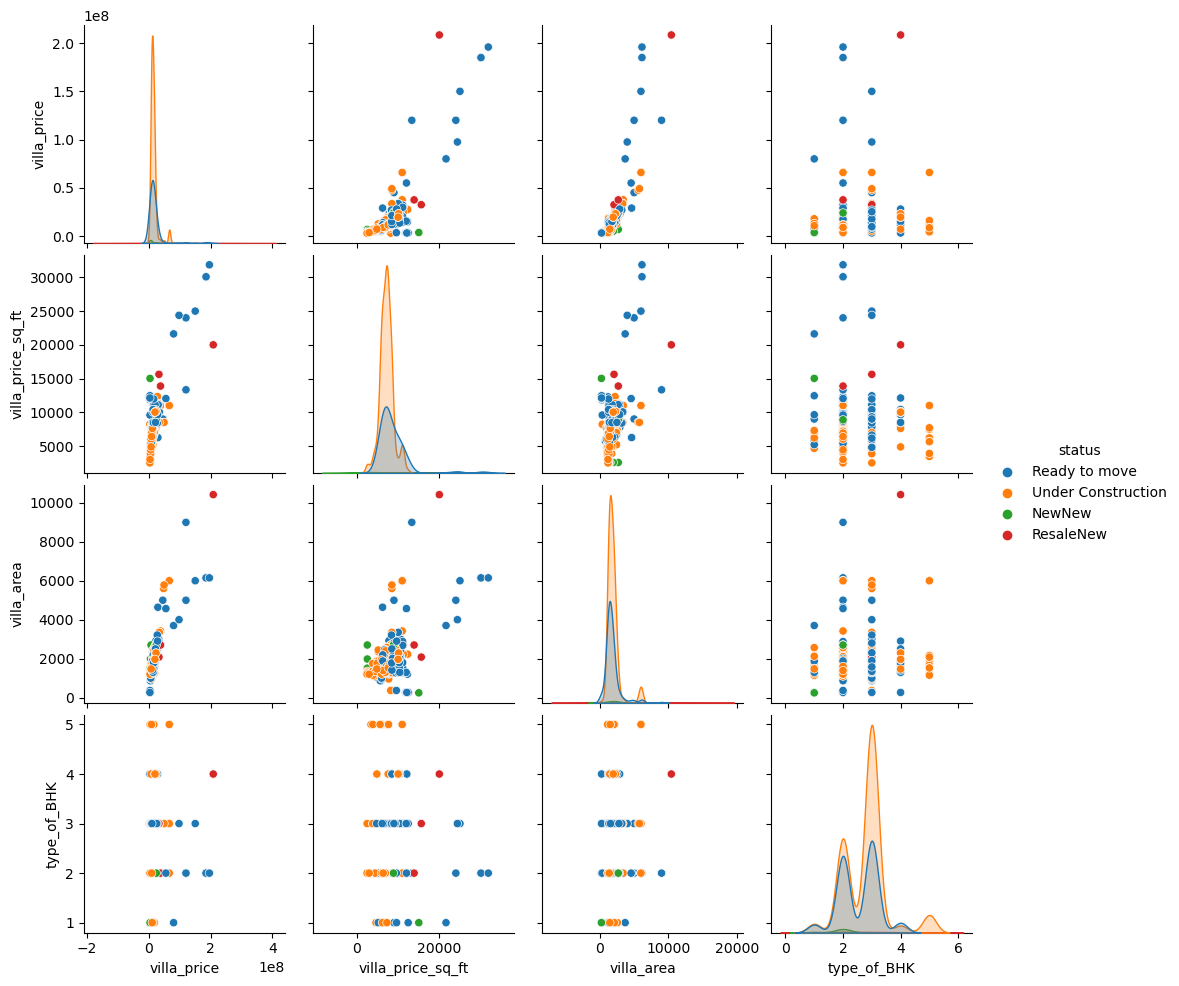

In [461]:
sns.pairplot(df,hue='status')

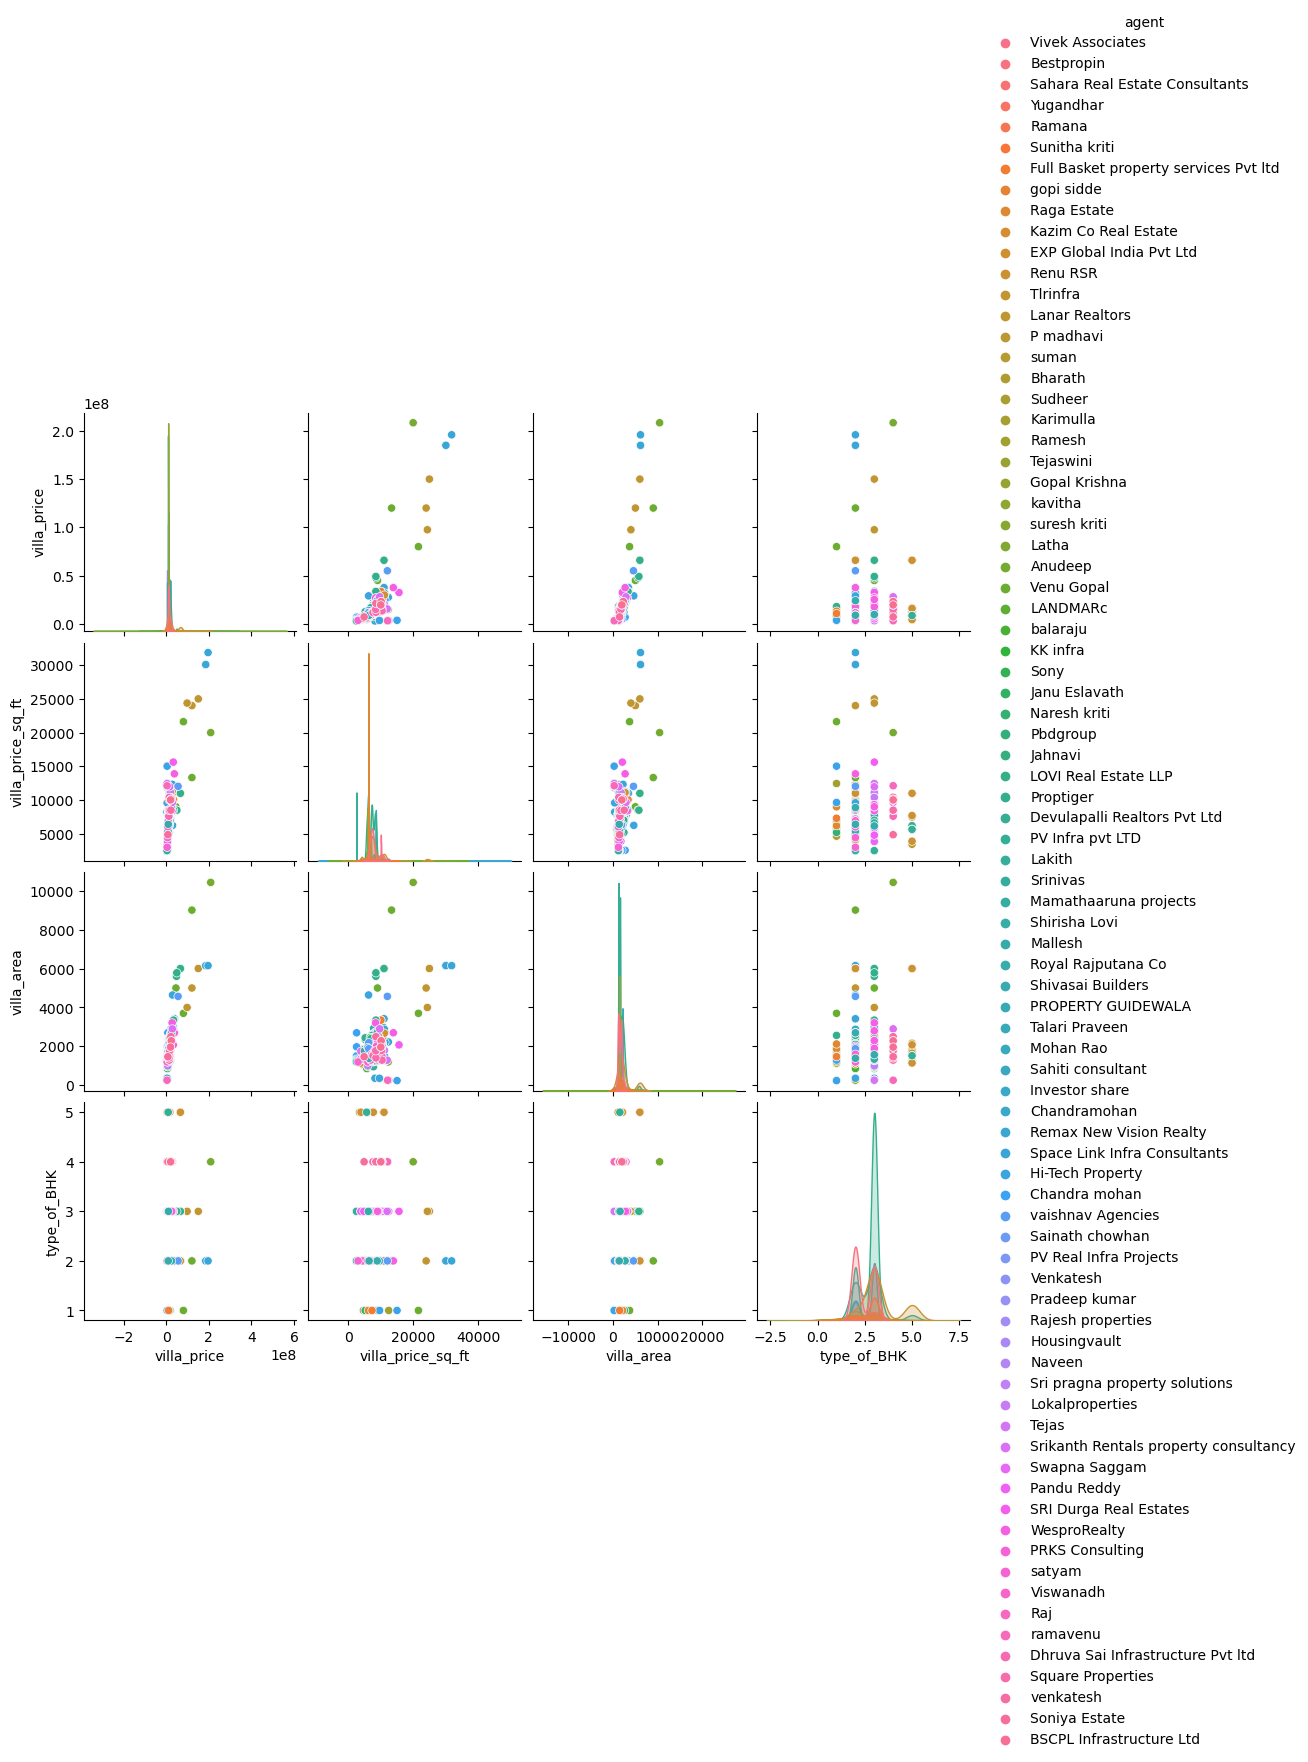

In [462]:
sns.pairplot(df,hue='agent')

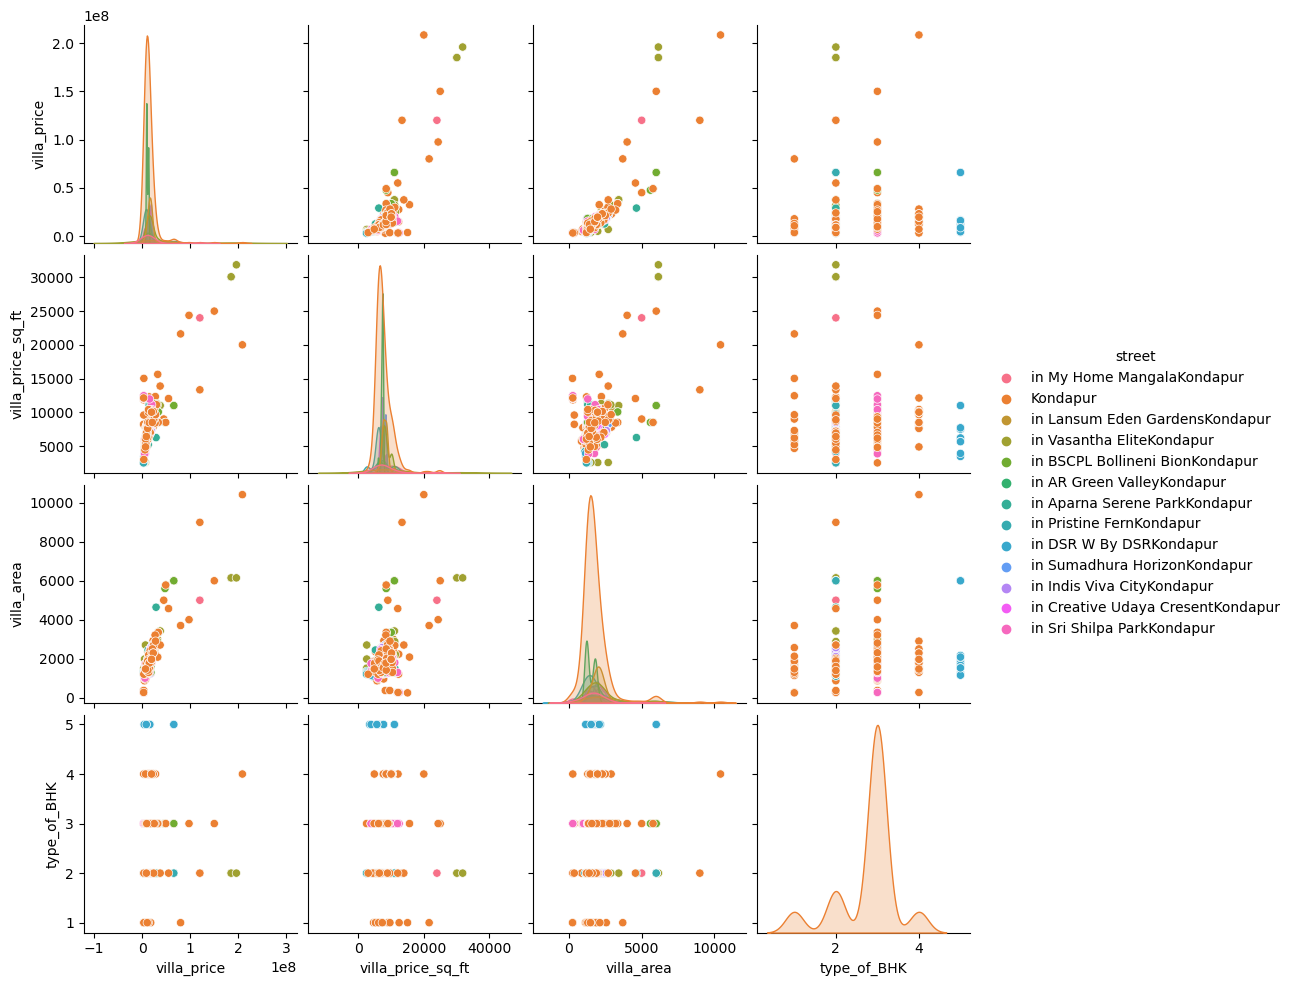

In [463]:
sns.pairplot(df,hue='street')

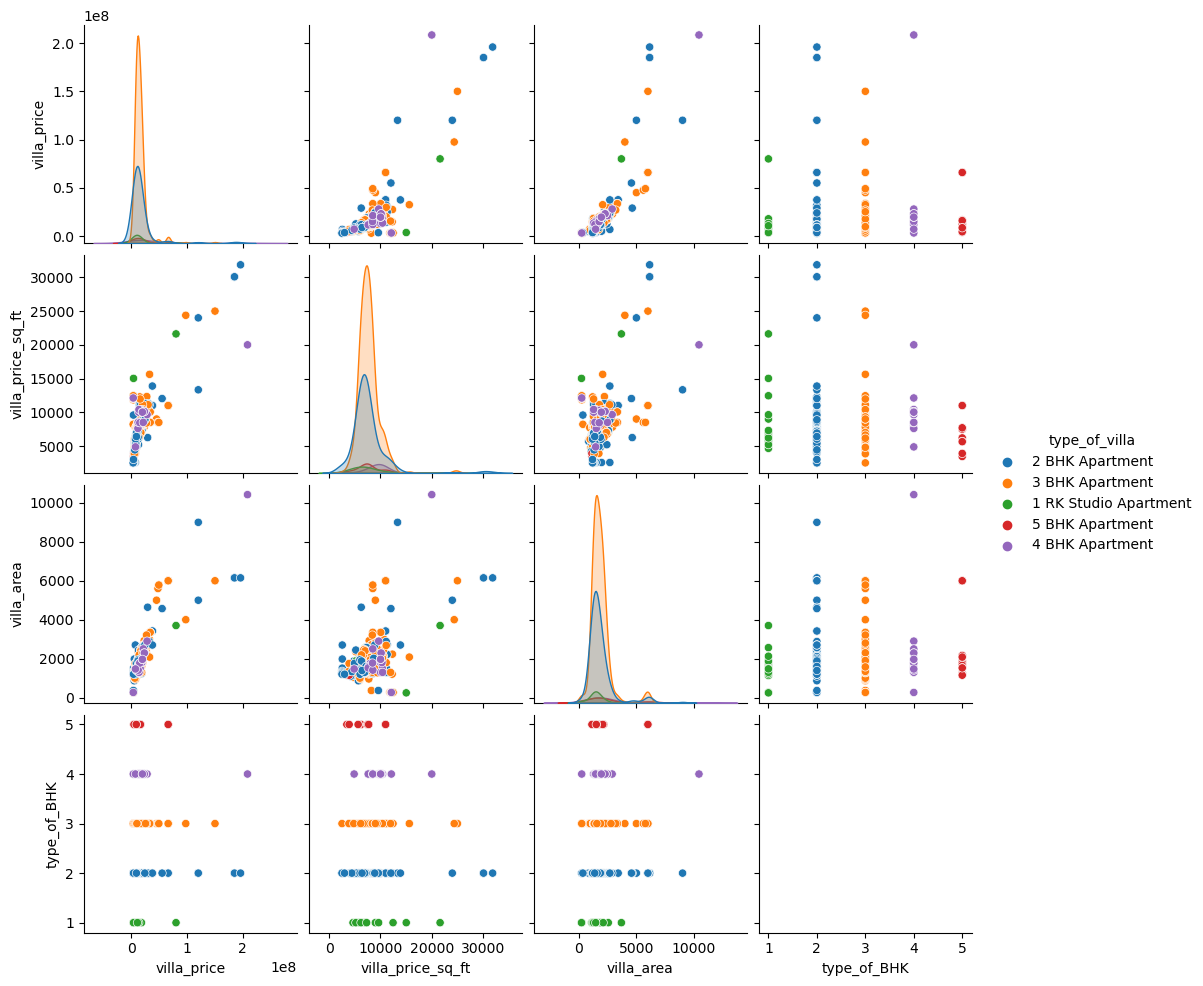

In [464]:
sns.pairplot(df,hue='type_of_villa')

<AxesSubplot:xlabel='status', ylabel='type_of_BHK'>

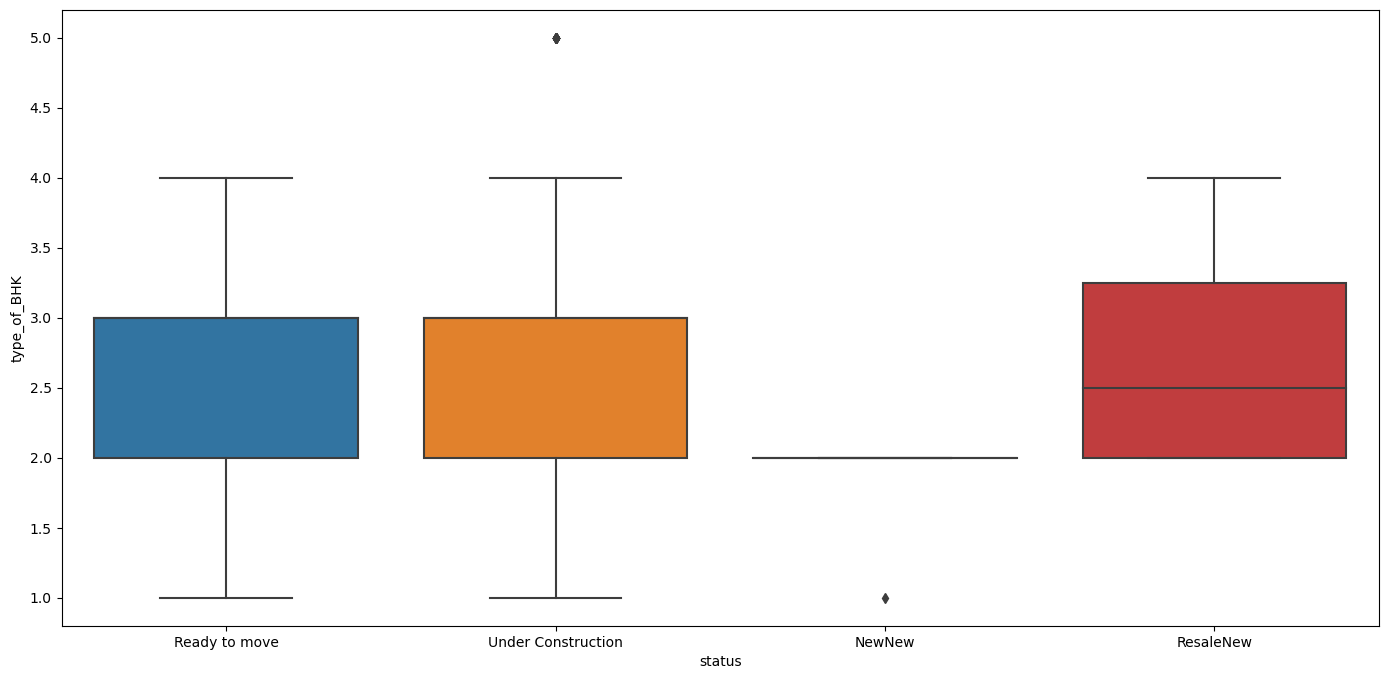

In [465]:
plt.figure(figsize=(17,8))
sns.boxplot(x=df.status,y=df.type_of_BHK)

<AxesSubplot:xlabel='type_of_villa', ylabel='villa_price'>

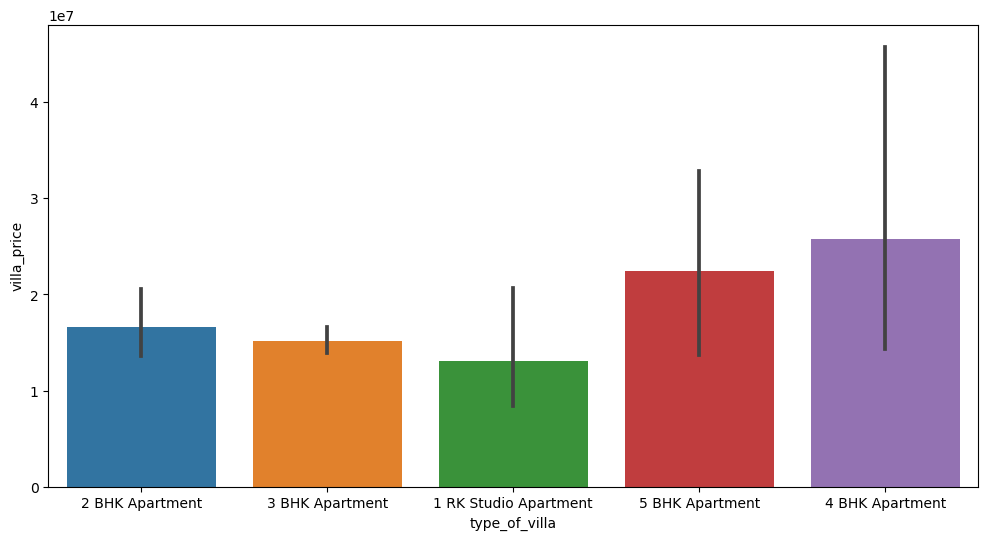

In [466]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.type_of_villa,y=df.villa_price)

In [467]:
df.groupby(['type_of_villa']).agg({'villa_price' : ['min', 'max', 'mean']})

villa_price                           
                              min          max          mean
type_of_villa                                               
1 RK Studio Apartment   3300000.0   80000000.0  1.311820e+07
2 BHK Apartment         3000000.0  195900000.0  1.661172e+07
3 BHK Apartment         3000000.0  150000000.0  1.514873e+07
4 BHK Apartment         3200000.0  208400000.0  2.582280e+07
5 BHK Apartment         4000000.0   65900000.0  2.243235e+07

<AxesSubplot:xlabel='type_of_villa'>

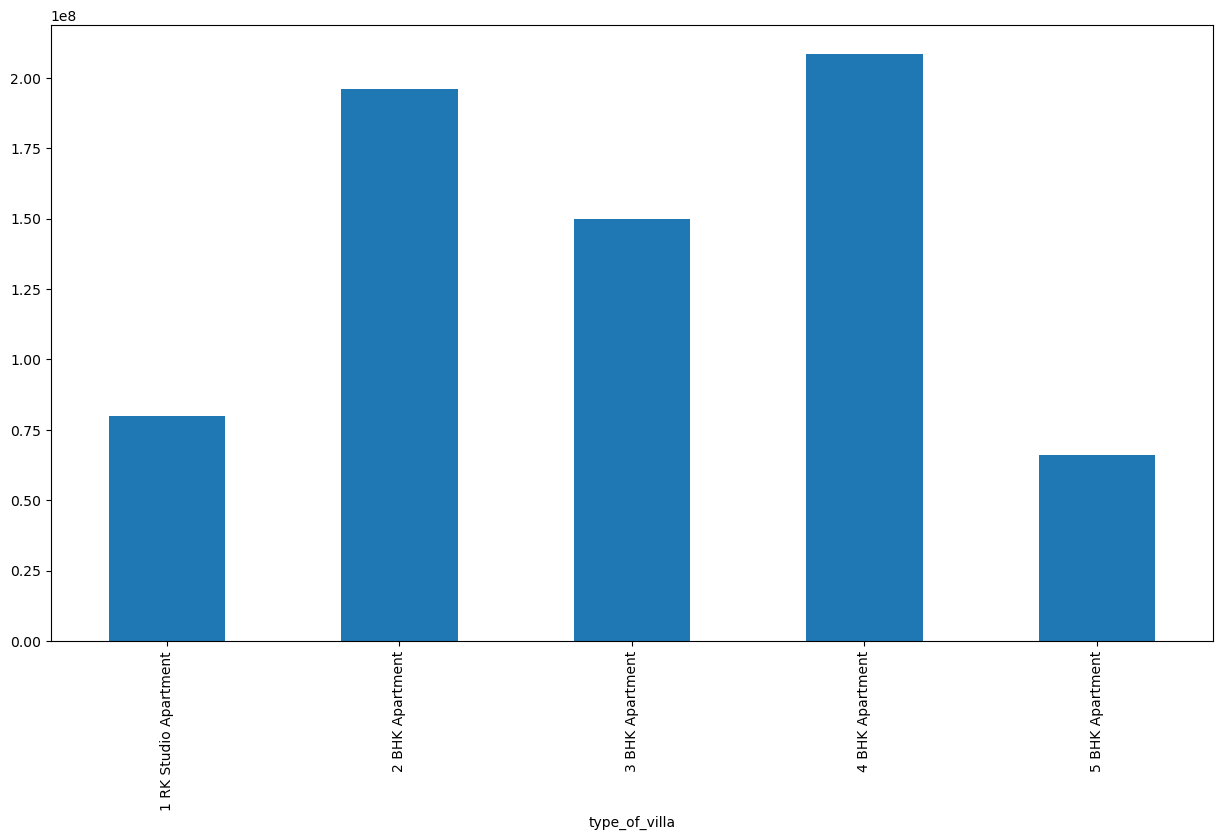

In [468]:
plt.figure(figsize=(15, 8))
df.groupby(['type_of_villa'])['villa_price'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='street', ylabel='villa_area'>

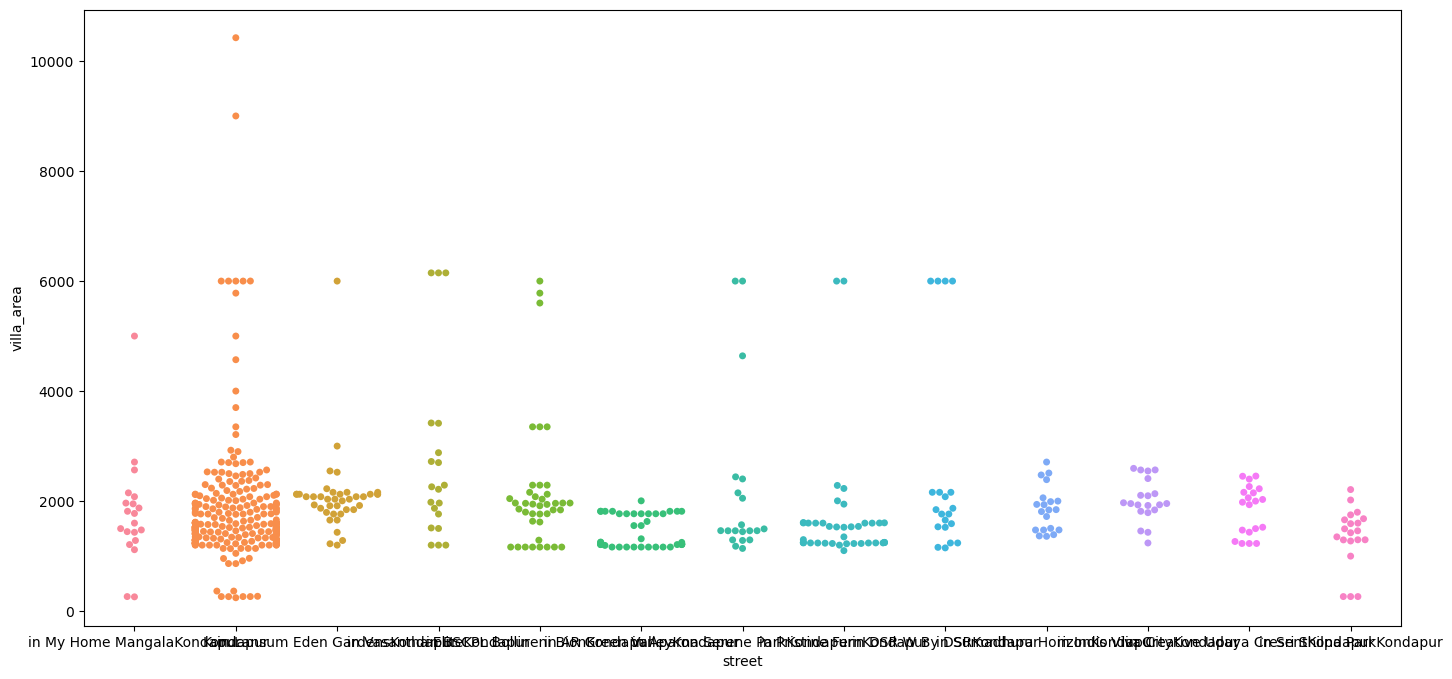

In [469]:
fig = plt.subplots(figsize=(17,8))

sns.swarmplot(data=df , x ='street',y='villa_area')

#  A person wants a Villa

# Here we will give information about villas with their priorities

In [470]:

# person wants to 4BHK in Kondapur 

df_v=df[(df["type_of_villa"]=="4 BHK Apartment")]


df_v


,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
580,"Kondapur, Hyderabad",28000000.0,4 BHK Apartment,9655.0,2900.0,4,Kondapur,Srikanth Rentals property consultancy,Ready to move
581,"Kondapur, Hyderabad",208400000.0,4 BHK Apartment,20000.0,10422.0,4,Kondapur,Anudeep,ResaleNew
582,"Kondapur, Hyderabad",14200000.0,4 BHK Apartment,8049.0,1765.0,4,Kondapur,Viswanadh,Under Construction
583,"Kondapur, Hyderabad",18000000.0,4 BHK Apartment,10011.0,1798.0,4,Kondapur,Viswanadh,Ready to move
584,"Kondapur, Hyderabad",12200000.0,4 BHK Apartment,7686.0,1590.0,4,Kondapur,Raj,Ready to move
585,"Kondapur, Hyderabad",3200000.0,4 BHK Apartment,12121.0,264.0,4,Kondapur,ramavenu,Ready to move
586,"Kondapur, Hyderabad",11600000.0,4 BHK Apartment,7606.0,1525.0,4,Kondapur,Dhruva Sai Infrastructure Pvt ltd,Under Construction
587,"Kondapur, Hyderabad",15500000.0,4 BHK Apartment,10360.0,1496.0,4,Kondapur,Square Properties,Ready to move
588,"Kondapur, Hyderabad",18500000.0,4 BHK Apartment,10289.0,1798.0,4,Kondapur,Square Properties,Ready to move
589,"Kondapur, Hyderabad",13000000.0,4 BHK Apartment,10023.0,1297.0,4,Kondapur,Square Properties,Ready to move


<AxesSubplot:xlabel='villa_area', ylabel='Density'>

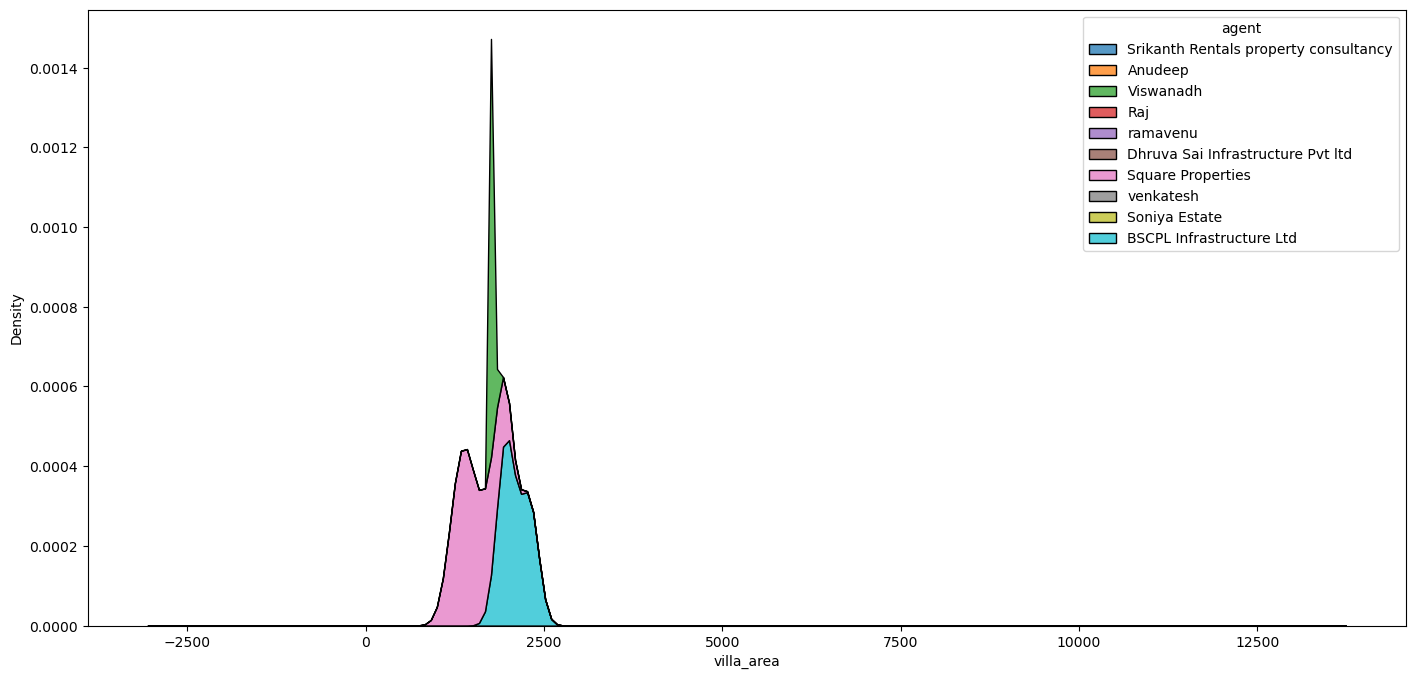

In [471]:
fig = plt.subplots(figsize=(17,8))
sns.kdeplot(data=df_v, x="villa_area", hue="agent", multiple="stack")


<AxesSubplot:xlabel='agent', ylabel='villa_price'>

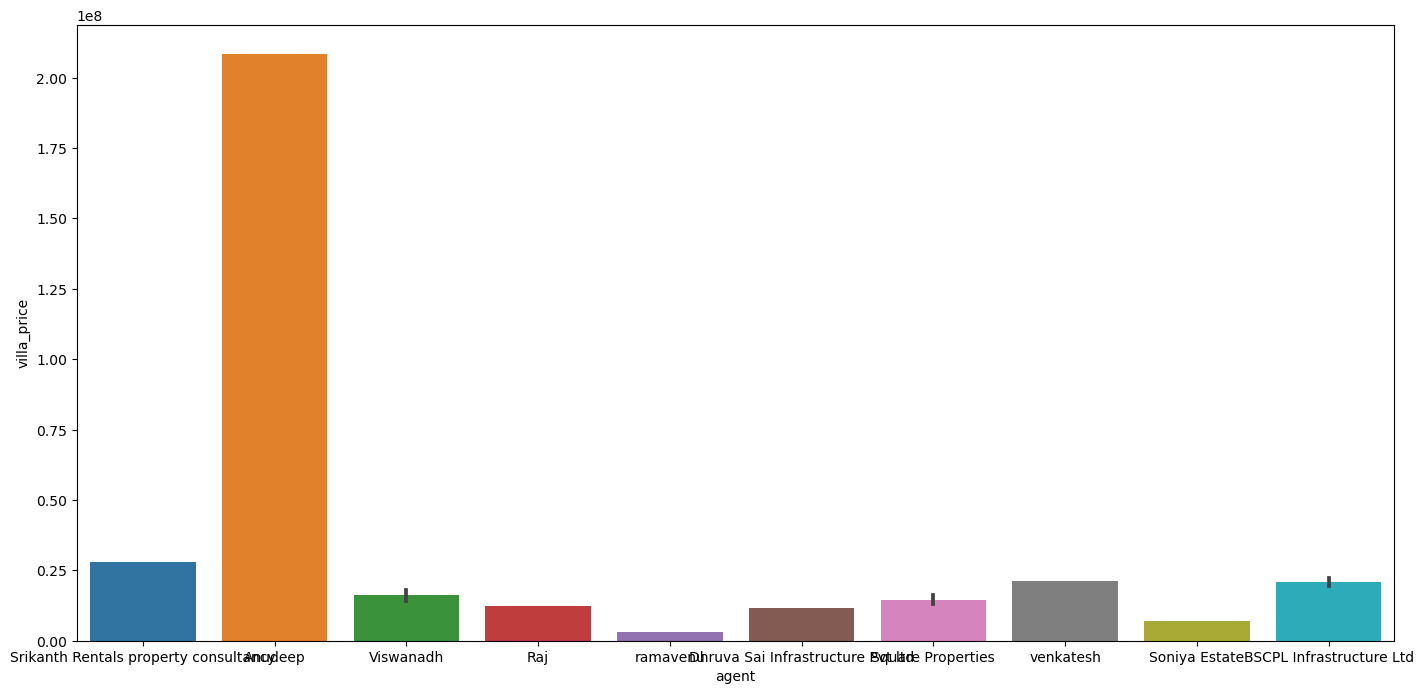

In [472]:
figure = plt.subplots(figsize=(17,8))
sns.barplot(x='agent',y='villa_price',data=df_v)

In [473]:
df_v1=df_v[(df_v["villa_area"]>=1800)&(df_v["villa_area"]<=6000)]
df_v1

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
580,"Kondapur, Hyderabad",28000000.0,4 BHK Apartment,9655.0,2900.0,4,Kondapur,Srikanth Rentals property consultancy,Ready to move
593,"Kondapur, Hyderabad",21200000.0,4 BHK Apartment,8500.0,2500.0,4,Kondapur,venkatesh,Ready to move
595,"Kondapur, Hyderabad",19600000.0,4 BHK Apartment,10017.0,1965.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
596,"Kondapur, Hyderabad",19600000.0,4 BHK Apartment,10017.0,1965.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
597,"Kondapur, Hyderabad",23100000.0,4 BHK Apartment,10123.0,2290.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
598,"Kondapur, Hyderabad",23100000.0,4 BHK Apartment,10123.0,2290.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
599,"Kondapur, Hyderabad",19600000.0,4 BHK Apartment,10017.0,1965.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction


In [474]:
df_v2=df_v1[(df_v1["villa_price"]>=20000000)&(df_v1["villa_price"]<=40000000)]

df_v2

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
580,"Kondapur, Hyderabad",28000000.0,4 BHK Apartment,9655.0,2900.0,4,Kondapur,Srikanth Rentals property consultancy,Ready to move
593,"Kondapur, Hyderabad",21200000.0,4 BHK Apartment,8500.0,2500.0,4,Kondapur,venkatesh,Ready to move
597,"Kondapur, Hyderabad",23100000.0,4 BHK Apartment,10123.0,2290.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction
598,"Kondapur, Hyderabad",23100000.0,4 BHK Apartment,10123.0,2290.0,4,Kondapur,BSCPL Infrastructure Ltd,Under Construction


#  A person wants a Apartment


# Here we will give information about Apartments with their priorities

In [475]:
df_A=df[(df["type_of_villa"]=="3 BHK Apartment")]
df_A.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
20,"Kondapur, Hyderabad",11000000.0,3 BHK Apartment,6111.0,1800.0,3,Kondapur,Tejaswini,Ready to move
21,"Kondapur, Hyderabad",10000000.0,3 BHK Apartment,6893.0,1460.0,3,Kondapur,Gopal Krishna,Under Construction
22,"Kondapur, Hyderabad",8400000.0,3 BHK Apartment,5936.0,1415.0,3,Kondapur,kavitha,Ready to move
23,"Kondapur, Hyderabad",12000000.0,3 BHK Apartment,7868.0,1525.0,3,Kondapur,suresh kriti,Under Construction
24,"Kondapur, Hyderabad",5000000.0,3 BHK Apartment,4761.0,1050.0,3,Kondapur,Latha,Ready to move


In [476]:
df_A1=df_A[(df_A["villa_price"]>=20000000)&(df_A["villa_price"]<=50000000)]
df_A1.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
27,"Kondapur, Hyderabad",45000000.0,3 BHK Apartment,9000.0,5000.0,3,Kondapur,Venu Gopal,Ready to move
43,"Kondapur, Hyderabad",22800000.0,3 BHK Apartment,7800.0,2925.0,3,Kondapur,Shirisha Lovi,Ready to move
54,"Kondapur, Hyderabad",27500000.0,3 BHK Apartment,12331.0,2230.0,3,Kondapur,Space Link Infra Consultants,Under Construction
56,"Kondapur, Hyderabad",20300000.0,3 BHK Apartment,10500.0,1940.0,3,Kondapur,Bestpropin,Ready to move
57,"Kondapur, Hyderabad",22500000.0,3 BHK Apartment,8302.0,2710.0,3,Kondapur,EXP Global India Pvt Ltd,Under Construction


<AxesSubplot:xlabel='villa_area', ylabel='Density'>

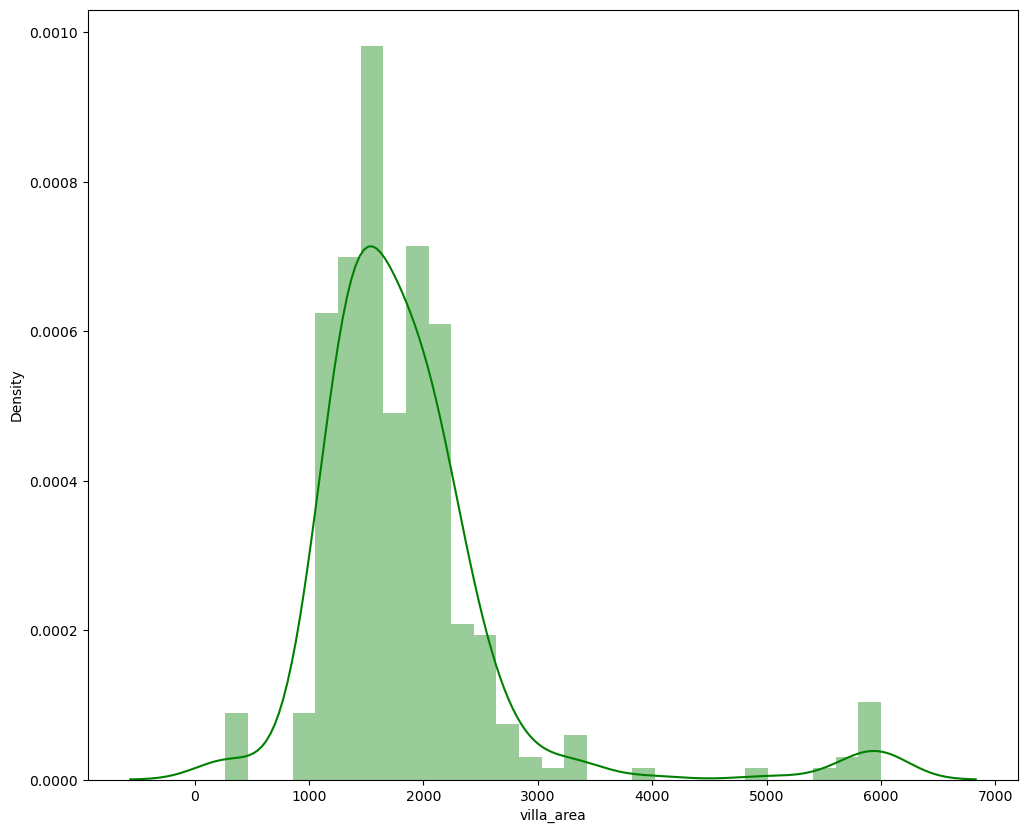

In [477]:
fig = plt.subplots(figsize=(12,10))
sns.distplot(df_A['villa_area'], kde=True, rug=False,color="green")



<AxesSubplot:xlabel='villa_area', ylabel='Density'>

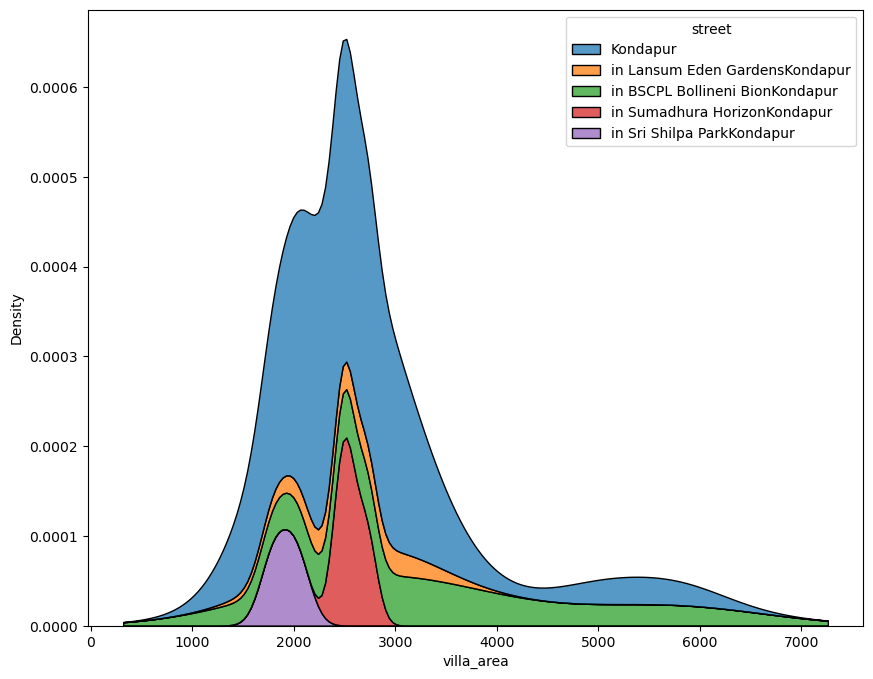

In [478]:
fig = plt.subplots(figsize=(10,8))
sns.kdeplot(data=df_A1, x="villa_area", hue="street", multiple="stack")

In [480]:
df_A2=df_A1[(df_A1["villa_area"]>=2500)&(df_A1["villa_area"]<=4000)]
df_A2.head()

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
43,"Kondapur, Hyderabad",22800000.0,3 BHK Apartment,7800.0,2925.0,3,Kondapur,Shirisha Lovi,Ready to move
57,"Kondapur, Hyderabad",22500000.0,3 BHK Apartment,8302.0,2710.0,3,Kondapur,EXP Global India Pvt Ltd,Under Construction
96,"Kondapur, Hyderabad",32000000.0,3 BHK Apartment,10666.0,3000.0,3,in Lansum Eden GardensKondapur,Chandramohan,Ready to move
126,"Kondapur, Hyderabad",33600000.0,3 BHK Apartment,10052.0,3350.0,3,in BSCPL Bollineni BionKondapur,Full Basket property services Pvt ltd,Ready to move
127,"Kondapur, Hyderabad",33600000.0,3 BHK Apartment,10052.0,3350.0,3,in BSCPL Bollineni BionKondapur,Full Basket property services Pvt ltd,Ready to move


In [481]:
df_A3=df_A2[df_A2["villa_price_sq_ft"]>=10000]
df_A3

,locality,villa_price,type_of_villa,villa_price_sq_ft,villa_area,type_of_BHK,street,agent,status
96,"Kondapur, Hyderabad",32000000.0,3 BHK Apartment,10666.0,3000.0,3,in Lansum Eden GardensKondapur,Chandramohan,Ready to move
126,"Kondapur, Hyderabad",33600000.0,3 BHK Apartment,10052.0,3350.0,3,in BSCPL Bollineni BionKondapur,Full Basket property services Pvt ltd,Ready to move
127,"Kondapur, Hyderabad",33600000.0,3 BHK Apartment,10052.0,3350.0,3,in BSCPL Bollineni BionKondapur,Full Basket property services Pvt ltd,Ready to move
209,"Kondapur, Hyderabad",29800000.0,3 BHK Apartment,11119.0,2680.0,3,Kondapur,EXP Global India Pvt Ltd,Ready to move
